In [56]:
pwd

'/home/wsuser/work'

In [57]:
!pip install keras
!pip install tensorflow

In [58]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [60]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [61]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [62]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='hqzxULgH_ew1aAW1cI_e9MRuUAWxxGx3pr9HKAjklIJY',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'realtimecommunicationsystempowere-donotdelete-pr-97hjepj4vka4ay'
object_key = 'conversation engine for deaf and dumb (4).zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [63]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [64]:
pwd

'/home/wsuser/work'

In [65]:
import os
filenames = os.listdir('/home/wsuser/work/Dataset/training_set')

In [66]:
x_train = train_datagen.flow_from_directory('/home/wsuser/work/Dataset/training_set',target_size=(64,64),class_mode="categorical",batch_size=30)

Found 15750 images belonging to 9 classes.


In [67]:
x_test= train_datagen.flow_from_directory('/home/wsuser/work/Dataset/test_set',target_size=(64,64),class_mode="categorical",batch_size=30)

Found 2250 images belonging to 9 classes.


In [68]:
x_test.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [69]:
model = Sequential()

In [70]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [71]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [72]:
model.add(Flatten())

In [73]:
model.add(Dense(200,activation='relu'))
model.add(Dense(9,activation="softmax"))

In [74]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [75]:
len(x_train)

525

In [76]:
len(x_test)

75

In [77]:
model.fit(x_train,epochs=10,validation_data=x_test,steps_per_epoch=len(x_train)//10,validation_steps=len(x_test))

Epoch 1/10
52/52 [==============================] - 8s 151ms/step - loss: 0.8741 - accuracy: 0.7147 - val_loss: 0.5753 - val_accuracy: 0.8333
Epoch 2/10
52/52 [==============================] - 8s 150ms/step - loss: 0.3098 - accuracy: 0.9128 - val_loss: 0.4800 - val_accuracy: 0.8684
Epoch 3/10
52/52 [==============================] - 8s 156ms/step - loss: 0.1773 - accuracy: 0.9583 - val_loss: 0.4335 - val_accuracy: 0.8996
Epoch 4/10
52/52 [==============================] - 8s 154ms/step - loss: 0.1426 - accuracy: 0.9590 - val_loss: 0.3500 - val_accuracy: 0.9409
Epoch 5/10
52/52 [==============================] - 8s 149ms/step - loss: 0.1011 - accuracy: 0.9667 - val_loss: 0.3381 - val_accuracy: 0.9284
Epoch 6/10
52/52 [==============================] - 8s 146ms/step - loss: 0.0777 - accuracy: 0.9776 - val_loss: 0.3398 - val_accuracy: 0.9462
Epoch 7/10
52/52 [==============================] - 8s 151ms/step - loss: 0.0689 - accuracy: 0.9795 - val_loss: 0.3033 - val_accuracy: 0.9516
Epoch 

In [78]:
model.save("aslpng.h5")

In [89]:
!tar -zcvf image-classification-model_new.tgz aslpng.h5

aslpng.h5


In [90]:
ls -1

aslpng.h5
Dataset/
image-classification-model_new.tgz


In [91]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 19.8 MB/s eta 0:00:01


In [92]:
#replace the credentials that you got from Watson Machine Learning service
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                   "url": "https://us-south.ml.cloud.ibm.com",
                   "apikey": "3ls6KARqw4K7Icbfhp-X36q5Q5UtIjkPBVHg67294jVf"
                  }
client = APIClient(wml_credentials)

In [93]:
client = APIClient(wml_credentials)

In [94]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources']if item['entity']["name"] == space_name)['metadata']['id'])

In [95]:
space_uid = guid_from_space_name(client, 'imageclassification')
print("Space UID = " + space_uid)

Space UID = 34eea79c-4e6f-446b-8079-3cbc5fe1e0fb


In [96]:
client.set.default_space(space_uid)

'SUCCESS'

In [97]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [98]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [99]:
model_details = client.repository.store_model(model= "image-classification-model_new.tgz",meta_props={
 client.repository.ModelMetaNames.NAME:"CNN",
 client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
 client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                              )
model_id = client.repository.get_model_id(model_details)

In [100]:
model_id

'bc85e23c-eb45-48f5-aa3f-e9548648e0e3'

In [101]:
client.repository.download(model_id, 'my_model.tar.gz')

Successfully saved model content to file: 'my_model.tar.gz'


'/home/wsuser/work/my_model.tar.gz'

In [79]:
from keras.models import load_model
import numpy as np
import cv2

In [80]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

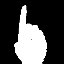

In [81]:
 model=load_model("aslpng.h5")
img = image.load_img('/home/wsuser/work/Dataset/training_set/D/15.png',target_size=(64,64))
img

In [82]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [83]:
x.shape

(64, 64, 3)

In [84]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [85]:
pred = model.predict(x)

In [86]:
pred

array([[0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [87]:
class_name=["A","B","C","D","E","F","G","H","I"]
pred_id = pred.argmax(axis=1)[0]
pred_id

3

In [88]:
print("the alphabet is ",str(class_name[pred_id]))

the alphabet is  D
